In [1]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 32.0 MB/s eta 0:00:00


In [201]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

# Read in Data

In [14]:
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [41]:
df.location_name.unique()

array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
       'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
       'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
       'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
       'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
       'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
       'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
       'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
       'Tegucigalpa', 'Buda

In [16]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [17]:
df.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


In [195]:
Bei = df[df['location_name']=='Beijing']
Bei['last_updated'] = pd.to_datetime(Bei['last_updated'])
Bei.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
36,China,Beijing,39.93,116.39,Asia/Shanghai,1715849100,2024-05-16 16:45:00,29.0,84.2,Sunny,...,84.9,107.8,4,10,04:58 AM,07:24 PM,12:17 PM,01:39 AM,Waxing Gibbous,55
231,China,Beijing,39.93,116.39,Asia/Shanghai,1715868000,2024-05-16 22:00:00,23.0,73.4,Clear,...,228.2,302.1,5,10,04:58 AM,07:24 PM,12:17 PM,01:39 AM,Waxing Gibbous,55
426,China,Beijing,39.93,116.39,Asia/Shanghai,1715961600,2024-05-18 00:00:00,24.0,75.2,Clear,...,221.9,265.9,5,10,04:58 AM,07:25 PM,01:18 PM,02:01 AM,Waxing Gibbous,64
618,China,Beijing,39.93,116.39,Asia/Shanghai,1716042600,2024-05-18 22:30:00,24.0,75.2,Clear,...,171.7,196.4,5,10,04:57 AM,07:26 PM,02:17 PM,02:21 AM,Waxing Gibbous,73
812,China,Beijing,39.93,116.39,Asia/Shanghai,1716127200,2024-05-19 22:00:00,20.0,68.0,Clear,...,43.5,52.3,3,5,04:56 AM,07:27 PM,03:17 PM,02:40 AM,Waxing Gibbous,81


In [172]:
Bei.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,datetime64[ns]
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


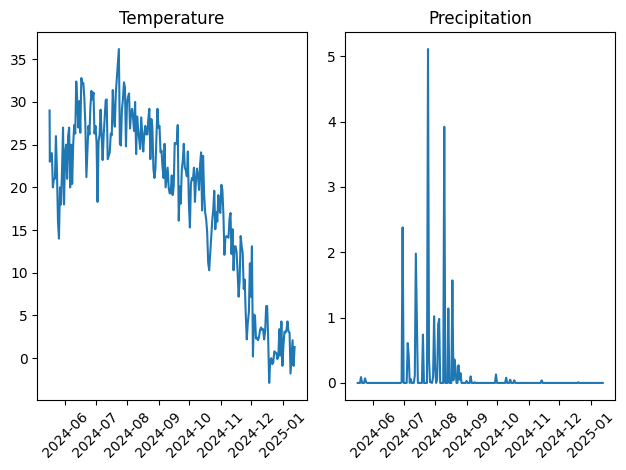

In [203]:

plt.subplot(1,2,1)
plt.plot(Bei['last_updated'], Bei['temperature_celsius'])
plt.title('Temperature')

plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(Bei['last_updated'], Bei['precip_mm'])
plt.title('Precipitation')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Train Model

In [204]:
data_precip = Bei[['last_updated', 'precip_mm']]
data_precip.dropna(inplace=True)
data_precip.columns = ['ds', 'y']

data_precip.head()

,ds,y
36,2024-05-16 16:45:00,0.00
231,2024-05-16 22:00:00,0.00
426,2024-05-18 00:00:00,0.00
618,2024-05-18 22:30:00,0.00
812,2024-05-19 22:00:00,0.09


In [205]:
data_precip

,ds,y
36,2024-05-16 16:45:00,0.00
231,2024-05-16 22:00:00,0.00
426,2024-05-18 00:00:00,0.00
618,2024-05-18 22:30:00,0.00
812,2024-05-19 22:00:00,0.09
...,...,...
45833,2025-01-08 18:30:00,0.00
46028,2025-01-09 18:30:00,0.00
46223,2025-01-10 18:45:00,0.00
46418,2025-01-11 18:15:00,0.00


In [206]:
# This Model is fitting precip_mm
m_precip = NeuralProphet()
m_precip.fit(data_precip, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.542227,0.0,0.339652,0.512905,0.542263,0.0,0
1,0.478853,0.0,0.308302,0.479478,0.478946,0.0,1
2,0.432031,0.0,0.282566,0.441919,0.431567,0.0,2
3,0.390356,0.0,0.262042,0.430805,0.393040,0.0,3
4,0.354688,0.0,0.241399,0.431177,0.355358,0.0,4
...,...,...,...,...,...,...,...
995,0.146005,0.0,0.105426,0.328309,0.147258,0.0,995
996,0.145991,0.0,0.104549,0.327691,0.145666,0.0,996
997,0.145980,0.0,0.104298,0.288001,0.145396,0.0,997
998,0.145977,0.0,0.104805,0.318538,0.146315,0.0,998


In [218]:
data_temp = Bei[['last_updated', 'temperature_celsius']]
data_temp.dropna(inplace=True)
data_temp.columns = ['ds', 'y']

data_temp.head()

,ds,y
36,2024-05-16 16:45:00,29.0
231,2024-05-16 22:00:00,23.0
426,2024-05-18 00:00:00,24.0
618,2024-05-18 22:30:00,24.0
812,2024-05-19 22:00:00,20.0


In [209]:
data_temp

,ds,y
36,2024-05-16 16:45:00,29.0
231,2024-05-16 22:00:00,23.0
426,2024-05-18 00:00:00,24.0
618,2024-05-18 22:30:00,24.0
812,2024-05-19 22:00:00,20.0
...,...,...
45833,2025-01-08 18:30:00,-1.8
46028,2025-01-09 18:30:00,0.2
46223,2025-01-10 18:45:00,2.1
46418,2025-01-11 18:15:00,-0.9


In [210]:
# This Model is fitting temperature_celsius
m_temp = NeuralProphet()
m_temp.fit(data_temp, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.395133,0.0,22.435814,26.693081,0.394506,0.0,0
1,0.341161,0.0,20.025621,23.951090,0.341260,0.0,1
2,0.294701,0.0,17.796242,21.404371,0.294415,0.0,2
3,0.256134,0.0,15.989007,19.044420,0.255854,0.0,3
4,0.219300,0.0,14.264448,17.047125,0.219124,0.0,4
...,...,...,...,...,...,...,...
995,0.009157,0.0,2.304469,2.865005,0.009153,0.0,995
996,0.009162,0.0,2.306899,2.855188,0.009161,0.0,996
997,0.009152,0.0,2.302592,2.867412,0.009142,0.0,997
998,0.009161,0.0,2.305638,2.824768,0.009158,0.0,998


# Forecast

## Showing Predictions for both Precipitation and Temperature


### Forecast Temperature in Fahrenheit for the next 700 days.

In [211]:
future_temp = m_temp.make_future_dataframe(data_temp, periods=700)
forecast_temp = m_temp.predict(future_temp)
forecast_temp.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.857% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.857% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.857% of the data.
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2025-01-13 18:30:00,None,-1.983639,-7.827280,-0.501868,6.345509
1,2025-01-14 18:30:00,None,-2.105816,-8.008254,-0.275205,6.177643
2,2025-01-15 18:30:00,None,-2.287901,-8.189228,-0.106572,6.007898
3,2025-01-16 18:30:00,None,-1.928030,-8.370203,0.234410,6.207762
4,2025-01-17 18:30:00,None,-2.252576,-8.551180,0.337651,5.960954


In [215]:
plt = m_temp.plot(forecast_temp)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [212]:
plt = m_temp.plot_components(forecast_temp)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


### Forecast Precipitation in mm for the next 700 days.

In [213]:
future_precip = m_precip.make_future_dataframe(data_precip, periods=700)
forecast_precip = m_precip.predict(future_precip)
forecast_precip.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 39.749% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 39.749% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.857% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.857% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.857% of the data.
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2025-01-13 18:30:00,None,-0.006812,-0.137922,-0.006820,0.137929
1,2025-01-14 18:30:00,None,-0.006200,-0.137900,-0.003969,0.135669
2,2025-01-15 18:30:00,None,-0.003075,-0.137877,0.001407,0.133395
3,2025-01-16 18:30:00,None,-0.008040,-0.137855,-0.005791,0.135606
4,2025-01-17 18:30:00,None,0.005545,-0.137832,0.007276,0.136101


In [148]:
plt = m_precip.plot(forecast_precip)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [214]:
plt = m_precip.plot_components(forecast_precip)
plt.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
